In [7]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [8]:
path = '/Users/nicolelubaczewska/Downloads/fifa2021.csv'

fifa21 = pd.read_csv(path)

fifa21

,id,name,nationality,position,rating,age,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,Atlético Madrid
...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,Zamora Fútbol Club


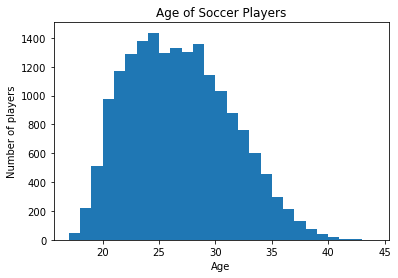

In [9]:
plt.hist(fifa21.age, range(17,45,1)) 
plt.title('Age of Soccer Players')
plt.xlabel('Age')
plt.ylabel('Number of players')

plt.savefig('AgeFifa21.png')

In [1]:
# Describing the distribution

# The distribution of age is right skew, meaning that older players are rare
# and younger players are more common

# The distribution is unimodal and asymmetric

In [84]:
#5 Identify the top ten countries by average player rating. Using only plates from
#this set of countries, compute the average rating by nationality and represent 
#this data using a horizontal bar chart, with values sorted from highest rating to lowest rating.

fifaex5 = fifa21[['rating', 'nationality']].groupby('nationality').agg('mean')

fifaex5.sort_values('rating', ascending = False).head(10)


,rating
nationality,
Tanzania,78.000000
Mozambique,72.000000
Brazil,71.422819
Ermenia,71.400000
Algeria,71.188679
Egypt,71.064516
Bahrain,71.000000
Libya,71.000000
Ukraine,70.714286


In [10]:
#TOP 10 countries

countries = ['Tanzania', 'Mozambique', 'Brazil', 'Ermenia','Algeria','Egypt','Bahrain', 'Libya','Ukraine' ,'Gabon']

fifa21Filtered = fifa21[fifa21.nationality.isin(countries)]

avgRatingTable = fifa21Filtered[['rating','nationality']].groupby('nationality').agg('mean')

avgRatingTable



,rating
nationality,
Algeria,71.188679
Bahrain,71.000000
Brazil,71.422819
Egypt,71.064516
Ermenia,71.400000
Gabon,70.562500
Libya,71.000000
Mozambique,72.000000
Tanzania,78.000000


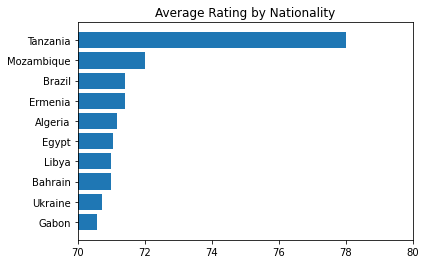

In [13]:
avgRatingTable = avgRatingTable.sort_values(by = 'rating', ascending = True)

plt.barh(avgRatingTable.index, avgRatingTable.rating)

plt.title('Average Rating by Nationality')
plt.xlim(70, 80)
plt.show()


/var/folders/9t/l79bhvd558sc7b67xwnk_ly00000gn/T/ipykernel_76991/69473159.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HighRating['nationality_filtered'] = HighRating.nationality


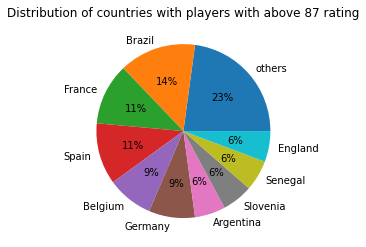

In [20]:
#6 

HighRating = fifa21[fifa21.rating > 87]

freqTable = HighRating.nationality.value_counts(normalize = True)

# Eliminating nations with less than 5%
nationsToChange = freqTable[freqTable < 0.05]
HighRating['nationality_filtered'] = HighRating.nationality
HighRating.loc[HighRating['nationality_filtered'].isin(nationsToChange.index), 'nationality_filtered'] = 'others'
freqTable = HighRating['nationality_filtered'].value_counts(normalize = True)


plt.title('Distribution of countries with players with above 87 rating')
plt.pie(freqTable, labels = freqTable.index, autopct = '%1.f%%')
plt.show()
